In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from fiona.crs import from_epsg

In [2]:
youbike_df = pd.read_csv('../sourceData/youbike.csv')
villages_shp = gpd.read_file('../../pycon2016-geoPandas/Example_in_Keynote/台灣里界圖_TWD97/')

In [3]:
taipei_villages_shp = villages_shp[(villages_shp['C_Name'] == u'臺北市') | (villages_shp['C_Name'] == u'新北市')].reset_index()

In [4]:
taipei_villages_shp = taipei_villages_shp.ix[:,['C_Name','V_Name','geometry']]

In [5]:
youbike_df_grouped = youbike_df.groupby(by=['lat','lng'], as_index=False)['date'].count()

In [6]:
youbike_df_grouped

,lat,lng,date
0,24.970415,121.543384,93
1,24.971496,121.536296,105
2,24.972127,121.539554,115
3,24.974181,121.534209,114
4,24.974272,121.542779,124
5,24.974996,121.542767,121
6,24.975308,121.527287,76
7,24.976180,121.546870,119
8,24.977227,121.538140,127
9,24.978494,121.524176,112


In [7]:
youbike_geo_convert = [Point(xy) for xy in zip(youbike_df_grouped.lng, youbike_df_grouped.lat)]
youbike_geometry = gpd.GeoDataFrame(youbike_df_grouped, crs=None, geometry=youbike_geo_convert)

In [8]:
youbike_geometry.crs = from_epsg(4326)
youbike_geometry = youbike_geometry.to_crs(epsg=3826)

In [9]:
youbike_geometry.crs

{'init': 'epsg:3826', 'no_defs': True}

In [10]:
len(taipei_villages_shp), len(youbike_geometry)

(1488, 307)

In [11]:
youbike_geometry

,lat,lng,date,geometry
0,24.970415,121.543384,93,POINT (304862.8380404218 2762610.508819708)
1,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832)
2,24.972127,121.539554,115,POINT (304475.3802496574 2762798.594953651)
3,24.974181,121.534209,114,POINT (303934.8233685432 2763023.970360846)
4,24.974272,121.542779,124,POINT (304800.0442620747 2763037.483520366)
5,24.974996,121.542767,121,POINT (304798.5119353718 2763117.672282281)
6,24.975308,121.527287,76,POINT (303235.4662861935 2763146.068514243)
7,24.976180,121.546870,119,POINT (305212.2361067012 2763250.480923573)
8,24.977227,121.538140,127,POINT (304330.3745893387 2763362.927545196)
9,24.978494,121.524176,112,POINT (302920.0073818367 2763497.747190079)


In [12]:
youbike_geometry['V_Name'] = None
youbike_geometry['C_Name'] = None
youbike_geometry['geometry_area'] = None
youbike_geometry['sum'] = 0
for b_idx, b_row in youbike_geometry.iterrows():
    #print 'checking', b_idx, 
    for v_idx, v_row in taipei_villages_shp.iterrows():
        if b_row['geometry'].intersects(v_row['geometry']):
            #print youbike_geometry['V_Name'][b_idx], 'is in', v_row['V_Name']
            youbike_geometry['V_Name'][b_idx] = v_row['V_Name']
            youbike_geometry['C_Name'][b_idx] = v_row['C_Name']
            youbike_geometry['geometry_area'][b_idx] = v_row['geometry']
    #mark if the village has no youbike station: youbike_geometry['sum'] = 0
        
    

/Library/Python/2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Python/2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
youbike_geometry['sum'] = youbike_geometry.groupby(by=['C_Name','V_Name'])['date'].transform('sum')

In [16]:
merged_df = youbike_geometry.merge(taipei_villages_shp, on=['C_Name','V_Name'], how='outer')

In [21]:
merged_df.fillna(0, inplace=True)

In [26]:
merged_df

,lat,lng,date,geometry_x,V_Name,C_Name,sum,geometry_y
0,24.970415,121.543384,93,POINT (304862.8380404218 2762610.508819708),五?里,新北市,93,"POLYGON ((305280.382743308 2762768.24855043, 3..."
1,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((295885.8855311065 2764278.914524885,..."
2,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((295712.7041726884 2769345.903158979,..."
3,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((299695.5314414395 2772584.693149519,..."
4,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((298989.1092779191 2765446.78715645, ..."
5,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((304265.6579682725 2763058.236592487,..."
6,24.971496,121.536296,105,POINT (304146.710391837 2762727.398670832),中正里,新北市,220,"POLYGON ((287789.8304005344 2758021.200325271,..."
7,24.972127,121.539554,115,POINT (304475.3802496574 2762798.594953651),中正里,新北市,220,"POLYGON ((295885.8855311065 2764278.914524885,..."
8,24.972127,121.539554,115,POINT (304475.3802496574 2762798.594953651),中正里,新北市,220,"POLYGON ((295712.7041726884 2769345.903158979,..."
9,24.972127,121.539554,115,POINT (304475.3802496574 2762798.594953651),中正里,新北市,220,"POLYGON ((299695.5314414395 2772584.693149519,..."


Populating the interactive namespace from numpy and matplotlib


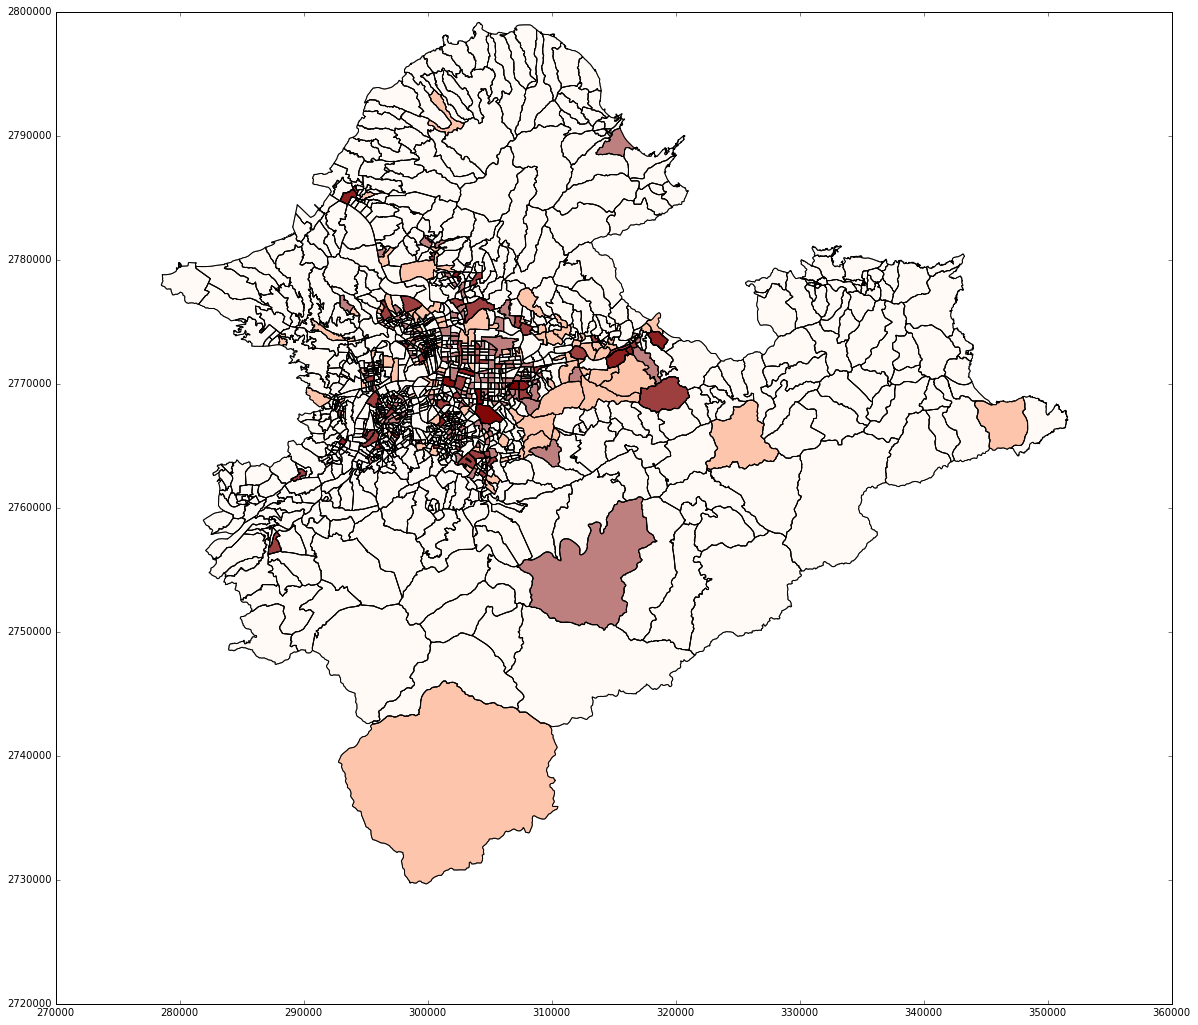

In [27]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
merged_df.drop('geometry_x', axis=1, inplace=True)
merged_df.rename(columns={'geometry_y':'geometry'}, inplace=True)
merged_df.plot(column='sum', scheme='QUANTILES', k=5, colormap='OrRd')

In [90]:
youbike_geometry['']

307

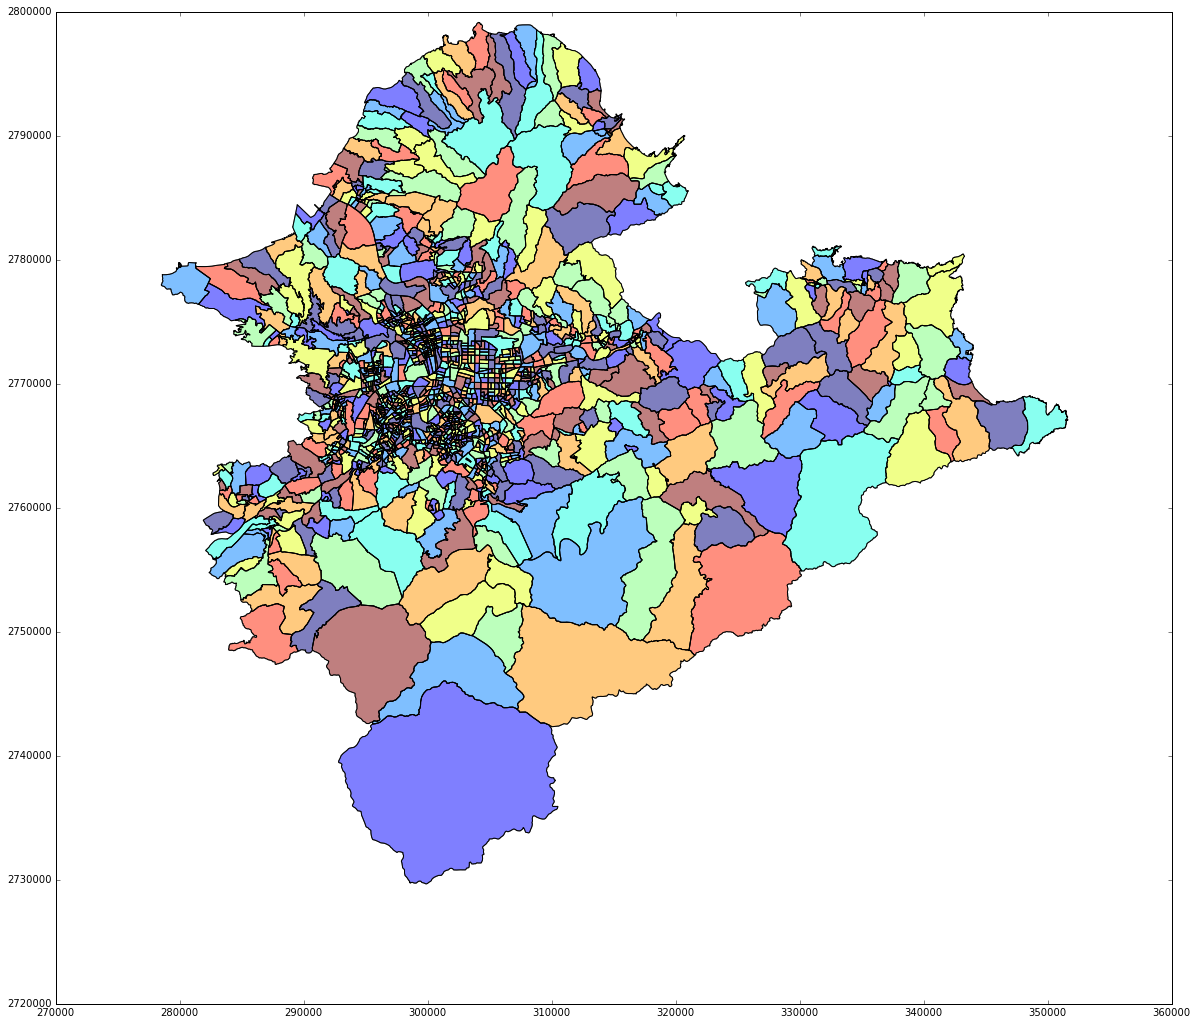

In [91]:
taipei_villages_shp.plot()